# Throughput

## Import Data

In [28]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid")

In [29]:
baseline="4.10.0+stock"

In [30]:
data_frames = []

for file in glob.glob("*.orun.bench"):
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pdjson.json_normalize(data)
        df['variant'] = file.replace(".orun.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

<ipython-input-30-0958bbb059cf>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pdjson.json_normalize(data)


,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.532988,4.504697,0.028004,37996,66666.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,163,4194537,8217,2,3182601,3182601,3.494000,4.10.0+multicore+redzone32,NaN,NaN
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.218466,4.035983,0.003999,29668,51658.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,162,4194470,8218,4,5790208,5790208,NaN,4.10.0+stock,4.0,0.0
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.531972,4.515655,0.015998,38056,66666.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,162,4194536,8217,2,3182601,3182601,3.494098,4.10.0+multicore,NaN,NaN
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.385071,4.368755,0.015988,37916,75341.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,163,4194537,8217,2,3182601,3182601,3.494000,4.10.0+multicore+redzone0,NaN,NaN
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.566125,2.386005,0.179849,430244,2822317.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,43624648,60800880,653,17,46729195,46729195,5.676935,4.10.0+multicore,NaN,NaN
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.021685,1.841239,0.180121,357088,2449386.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,43617977,45790007,698,13,49342464,49342464,NaN,4.10.0+stock,37.0,0.0
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.593185,2.364822,0.228079,430320,2822221.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,43624649,60800881,653,17,46729195,46729195,5.676920,4.10.0+multicore+redzone32,NaN,NaN
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.616023,2.415792,0.199982,430324,2950783.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,43624649,60800881,653,17,46729195,46729195,5.676920,4.10.0+multicore+redzone0,NaN,NaN
12,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.532885,17.398430,0.133970,283028,2449386.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,54255363,60420201,7887,20,37309440,37309440,NaN,4.10.0+stock,35.0,0.0
12,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,18.301929,18.133526,0.168014,302972,2822317.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,54860681,83955871,7830,26,32515799,32515799,26.304936,4.10.0+multicore,NaN,NaN


### Drop some benchmarks


In [31]:
df = df[(df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.532988,4.504697,0.028004,37996,66666.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,163,4194537,8217,2,3182601,3182601,3.494000,4.10.0+multicore+redzone32,NaN,NaN
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.218466,4.035983,0.003999,29668,51658.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,162,4194470,8218,4,5790208,5790208,NaN,4.10.0+stock,4.0,0.0
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.531972,4.515655,0.015998,38056,66666.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,162,4194536,8217,2,3182601,3182601,3.494098,4.10.0+multicore,NaN,NaN
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.385071,4.368755,0.015988,37916,75341.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,163,4194537,8217,2,3182601,3182601,3.494000,4.10.0+multicore+redzone0,NaN,NaN
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.566125,2.386005,0.179849,430244,2822317.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,43624648,60800880,653,17,46729195,46729195,5.676935,4.10.0+multicore,NaN,NaN
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.021685,1.841239,0.180121,357088,2449386.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,43617977,45790007,698,13,49342464,49342464,NaN,4.10.0+stock,37.0,0.0
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.593185,2.364822,0.228079,430320,2822221.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,43624649,60800881,653,17,46729195,46729195,5.676920,4.10.0+multicore+redzone32,NaN,NaN
22,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.616023,2.415792,0.199982,430324,2950783.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,43624649,60800881,653,17,46729195,46729195,5.676920,4.10.0+multicore+redzone0,NaN,NaN
12,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.532885,17.398430,0.133970,283028,2449386.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,54255363,60420201,7887,20,37309440,37309440,NaN,4.10.0+stock,35.0,0.0
12,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,18.301929,18.133526,0.168014,302972,2822317.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,54860681,83955871,7830,26,32515799,32515799,26.304936,4.10.0+multicore,NaN,NaN


### Selection example

```
select * from df where variant = '4.10.0+trunk' and time_secs > 10
```

In [32]:
df.loc[(df['variant'] == baseline) & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
12,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,17.532885,17.398430,0.133970,283028,2449386.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,54255363,60420201,7887,20,37309440,37309440,NaN,4.10.0+stock,35.0,0.0
42,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,11.725996,11.665649,0.060008,154996,237312.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,270315861,270315861,3527,63,18974208,18974208,NaN,4.10.0+stock,33.0,0.0
48,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,293.342959,292.989665,0.351997,673148,4945689.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,648185762,660023565,273430,68,80033280,80033280,NaN,4.10.0+stock,39.0,0.0
6,coq.BasicSyntax.v,taskset --cpu-list 5 coqc benchmarks/coq/Basic...,104.018834,103.794169,0.223996,392832,4945689.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,317208662,328831788,90142,41,45758976,45758976,NaN,4.10.0+stock,35.0,0.0
38,cpdf.scale,taskset --cpu-list 5 cpdf scale-to-fit a4lands...,13.766666,13.590144,0.176027,237776,965691.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,84924904,95514308,2267,29,28857856,28857856,NaN,4.10.0+stock,36.0,0.0
44,cpdf.squeeze,taskset --cpu-list 5 cpdf -squeeze benchmarks/...,16.432945,16.268530,0.163965,311528,965691.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,124885556,140556185,1621,34,38164992,38164992,NaN,4.10.0+stock,38.0,0.0
43,cubicle.german_pfs.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,234.789072,234.487010,0.300746,468072,1009821.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,444610883,3254854686,84452,377,58503168,58503168,NaN,4.10.0+stock,32.0,0.0
25,cubicle.szymanski_at.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,566.162048,566.072125,0.088662,139744,1009821.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,6206949578,6365128033,405888,1527,16629248,16629248,NaN,4.10.0+stock,23.0,0.0
15,evolutionary_algorithm.10000_10000,taskset --cpu-list 5 ./evolutionary_algorithm....,68.461066,66.880451,1.580010,2810376,140709.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,715354,1300975367,14253,32,357150208,357150208,NaN,4.10.0+stock,54.0,0.0
30,fannkuchredux.12,taskset --cpu-list 5 ./fannkuchredux.exe 12,78.609458,78.605096,0.003999,3428,237597.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,0,0,0,0,126976,126976,NaN,4.10.0+stock,1.0,0.0


In [33]:
df.loc[df['name'] == 'LU_decomposition.1024']

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant,gc.heap_chunks,gc.compactions
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.532988,4.504697,0.028004,37996,66666.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,163,4194537,8217,2,3182601,3182601,3.494000,4.10.0+multicore+redzone32,NaN,NaN
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.218466,4.035983,0.003999,29668,51658.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,162,4194470,8218,4,5790208,5790208,NaN,4.10.0+stock,4.0,0.0
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.531972,4.515655,0.015998,38056,66666.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,162,4194536,8217,2,3182601,3182601,3.494098,4.10.0+multicore,NaN,NaN
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.385071,4.368755,0.015988,37916,75341.0,https://github.com/kayceesrk/ocaml-multicore/a...,4.10.0+multicore,gcc,...,163,4194537,8217,2,3182601,3182601,3.494000,4.10.0+multicore+redzone0,NaN,NaN


### Projection example

```
select name, variant, time_secs from df
```

In [34]:
df.filter(['name','variant','time_secs'])

,name,variant,time_secs
10,LU_decomposition.1024,4.10.0+multicore+redzone32,4.532988
10,LU_decomposition.1024,4.10.0+stock,4.218466
10,LU_decomposition.1024,4.10.0+multicore,4.531972
10,LU_decomposition.1024,4.10.0+multicore+redzone0,4.385071
22,alt-ergo.fill.why,4.10.0+multicore,2.566125
22,alt-ergo.fill.why,4.10.0+stock,2.021685
22,alt-ergo.fill.why,4.10.0+multicore+redzone32,2.593185
22,alt-ergo.fill.why,4.10.0+multicore+redzone0,2.616023
12,alt-ergo.yyll.why,4.10.0+stock,17.532885
12,alt-ergo.yyll.why,4.10.0+multicore,18.301929


## Helper functions

In [35]:
import numpy as np

nameMap = {}
nameMap['bdd.26'] = 'bdd'
nameMap['binarytrees5.21'] = 'binarytrees'
nameMap['chameneos_redux_lwt.600000'] = 'chameneos_redux_lwt'
nameMap['cpdf.blacktext'] = 'cpdf.blacktext'
nameMap['cpdf.scale'] = 'cpdf.scale'
nameMap['cpdf.squeeze'] = 'cpdf.squeeze'
nameMap['durand-kerner-aberth.'] = 'durand-kerner-aberth'
nameMap['fannkuchredux.12'] = 'fannkuchredux'
nameMap['fannkuchredux2.12'] = 'fannkuchredux2'
nameMap['fasta3.25_000_000'] = 'fasta3'
nameMap['fasta6.25_000_000'] = 'fasta6'
nameMap['fft.'] = 'fft'
nameMap['game_of_life.256'] = 'game_of_life'
nameMap['kb.'] = 'kb'
nameMap['kb_no_exc.'] = 'kb_no_exc'
nameMap['knucleotide.'] = 'knucleotide'
nameMap['knucleotide3.'] = 'knucleotide3'
nameMap['levinson-durbin.'] = 'levinson-durbin'
nameMap['lexifi-g2pp.'] = 'lexifi-g2pp'
nameMap['lu-decomposition.'] = 'lu-decomposition'
nameMap['mandelbrot6.16_000'] = 'mandelbrot6'
nameMap['matrix_multiplication.1024'] = 'matrix_mult'
nameMap['menhir.ocamly'] = 'menhir.ocamly'
nameMap['menhir.sql-parser'] = 'menhir.sql-parser'
nameMap['menhir.sysver'] = 'menhir.sysver'
nameMap['minilight.roomfront'] = 'minilight.roomfront'
nameMap['naive-multilayer.'] = 'naive-multilayer'
nameMap['nbody.50_000_000'] = 'nbody'
nameMap['pidigits5.10_000'] = 'pidigits5'
nameMap['qr-decomposition.'] = 'qr-decomposition'
nameMap['quicksort.4000000'] = 'quicksort'
nameMap['regexredux2.'] = 'regexredux2'
nameMap['revcomp2.'] = 'revcomp2'
nameMap['sequence_cps.10000'] = 'sequence_cps'
nameMap['setrip.-enc_-rseed_1067894368'] = 'setrip'
nameMap['spectralnorm2.5_500'] = 'spectralnorm2'
nameMap['test_decompress.64_524_288'] = 'decompress'
nameMap['test_lwt.200'] = 'test_lwt'
nameMap['thread_ring_lwt_mvar.20_000'] = 'thread_ring_lwt_mvar'
nameMap['thread_ring_lwt_stream.20_000'] = 'thread_ring_lwt_stream'
nameMap['yojson_ydump.sample.json'] = 'yojson_ydump'
nameMap['zarith_pi.5000'] = 'zarith_pi'
nameMap['LU_decomposition.1024'] = 'lu_decomposition'
nameMap['floyd_warshall.512'] = 'floyd_warshall'
nameMap['alt-ergo.fill.why'] = 'alt-ergo.fill.why'
nameMap['alt-ergo.yyll.why'] = 'alt-ergo.yyll.why'
nameMap['coq.AbstractInterpretation.v'] = 'coq.AbsInterp.v'
nameMap['coq.BasicSyntax.v'] = 'coq.BasicSyntax.v'
nameMap['crout-decomposition.'] = 'crout-decomposition'
nameMap['cubicle.german_pfs.cub'] = 'cubicle.german_pfs'
nameMap['cubicle.szymanski_at.cub'] = 'cubicle.szymanski_at'
nameMap['evolutionary_algorithm.10000_10000'] = 'evolutionary_algorithm'
nameMap['grammatrix.'] = 'gammatrix'
nameMap['imrin_mem_rw.10_000_50_000_20_100_000_000'] = 'imrin_mem_rw.reads'
nameMap['imrin_mem_rw.10_000_50_000_80_100_000_000'] = 'imrin_mem_rw.writes'



def remapName(n):
    return nameMap[n]

# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
    variant_metric_name = list([ zip(df[metric], df[x], df['name']) 
              for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
#     print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#     print(name_metric)
    disp_name = [remapName(name)+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
        (v,data) = group
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
#                 print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

## Time

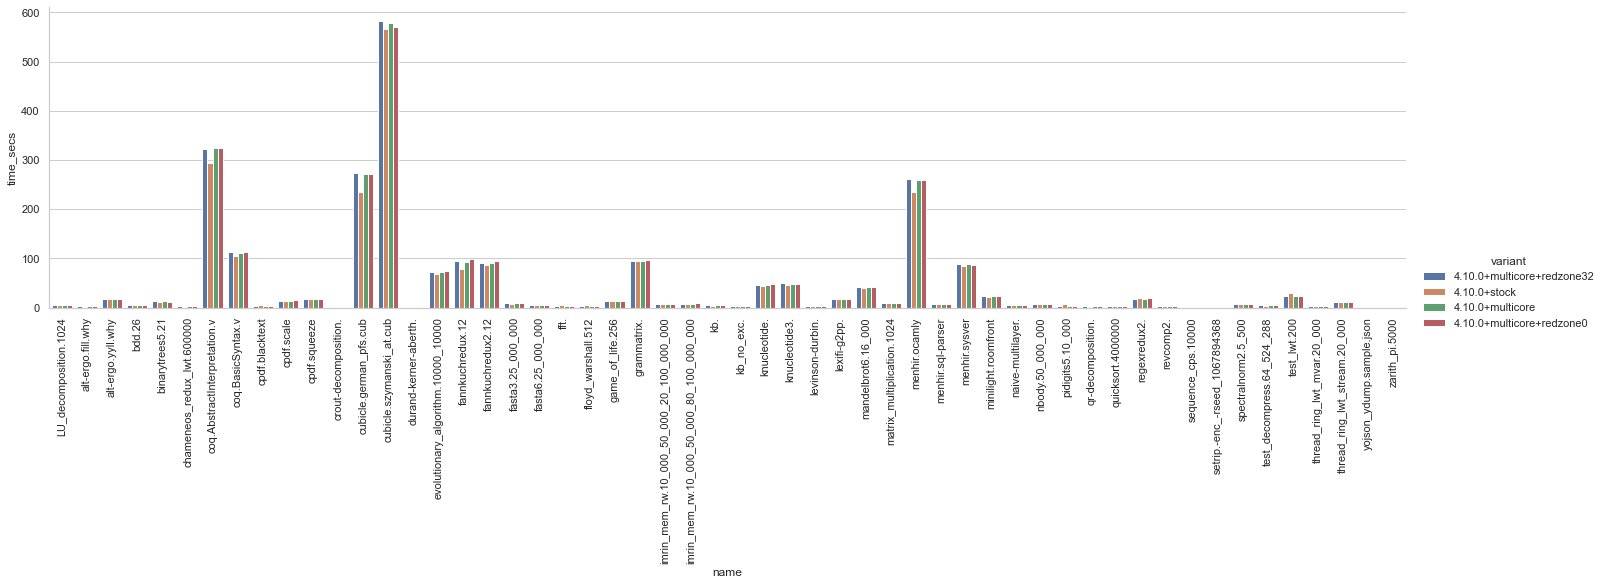

In [36]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-35-b900b1f7d74d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


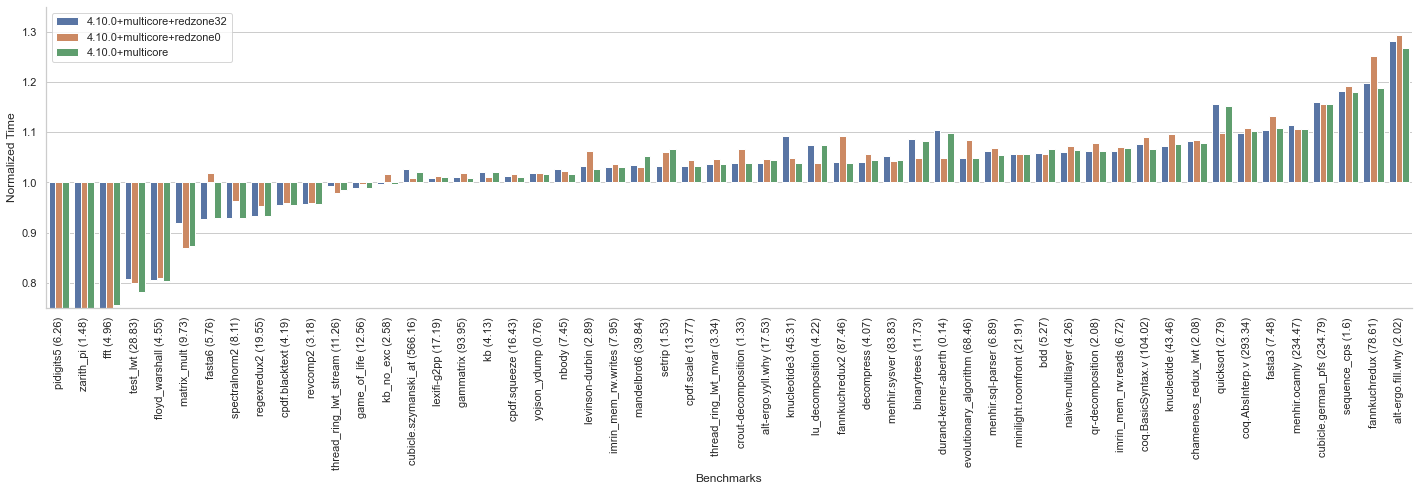

In [37]:
ndf = normalise(df,baseline,'time_secs')
g = plot_normalised(ndf,baseline,'ntime_secs')
g.ax.set_ylim(0.75,1.35)
g.ax.legend(loc=2)
g.ax.set_xlabel("Benchmarks")
g.ax.set_ylabel("Normalized Time")
g

In [38]:
for g in ndf.groupby('variant'):
    (v,_df) = g
    print(v,geo_mean(_df['ntime_secs'].values))

4.10.0+multicore 0.9909322801954278
4.10.0+multicore+redzone0 0.9976095636013624
4.10.0+multicore+redzone32 0.9932941553358129


## Top heap words

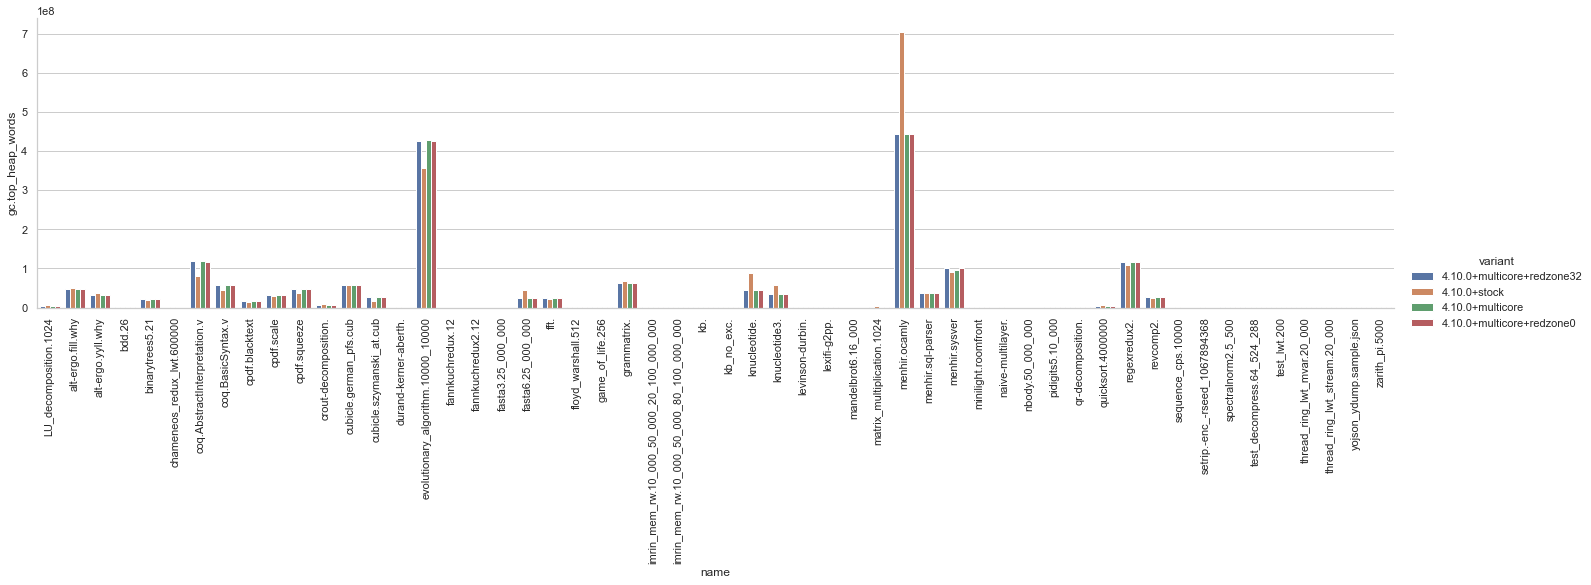

In [39]:
g = sns.catplot (x='name', y='gc.top_heap_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-35-b900b1f7d74d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


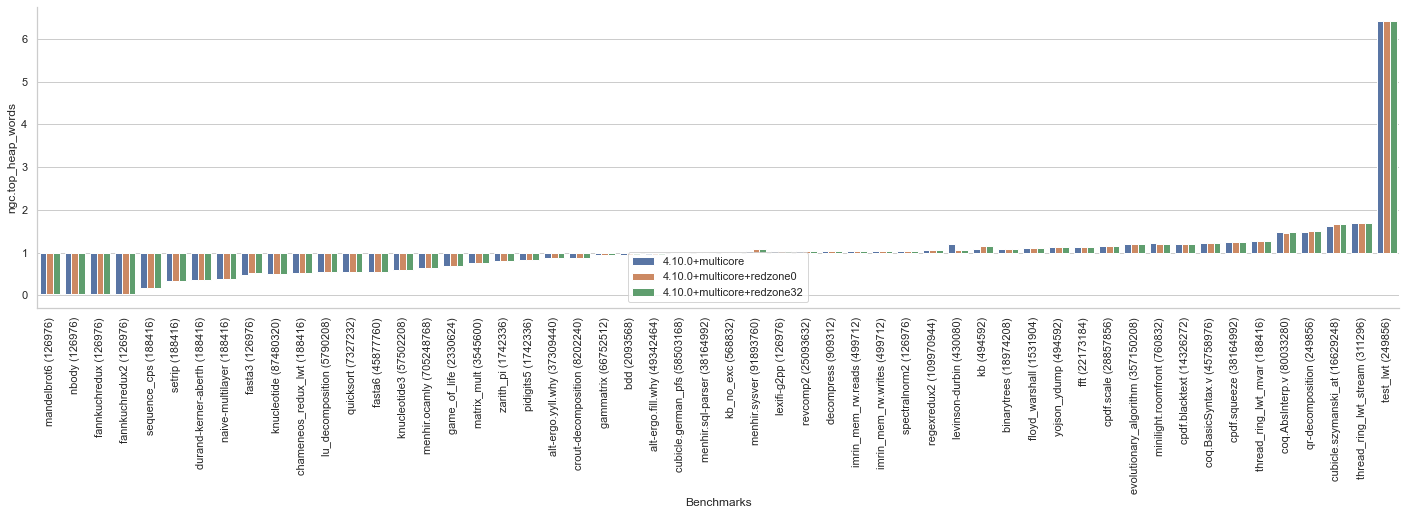

In [40]:
ndf = normalise(df,baseline,'gc.top_heap_words')
plot_normalised(ndf,baseline,'ngc.top_heap_words')

## Max RSS (KB)

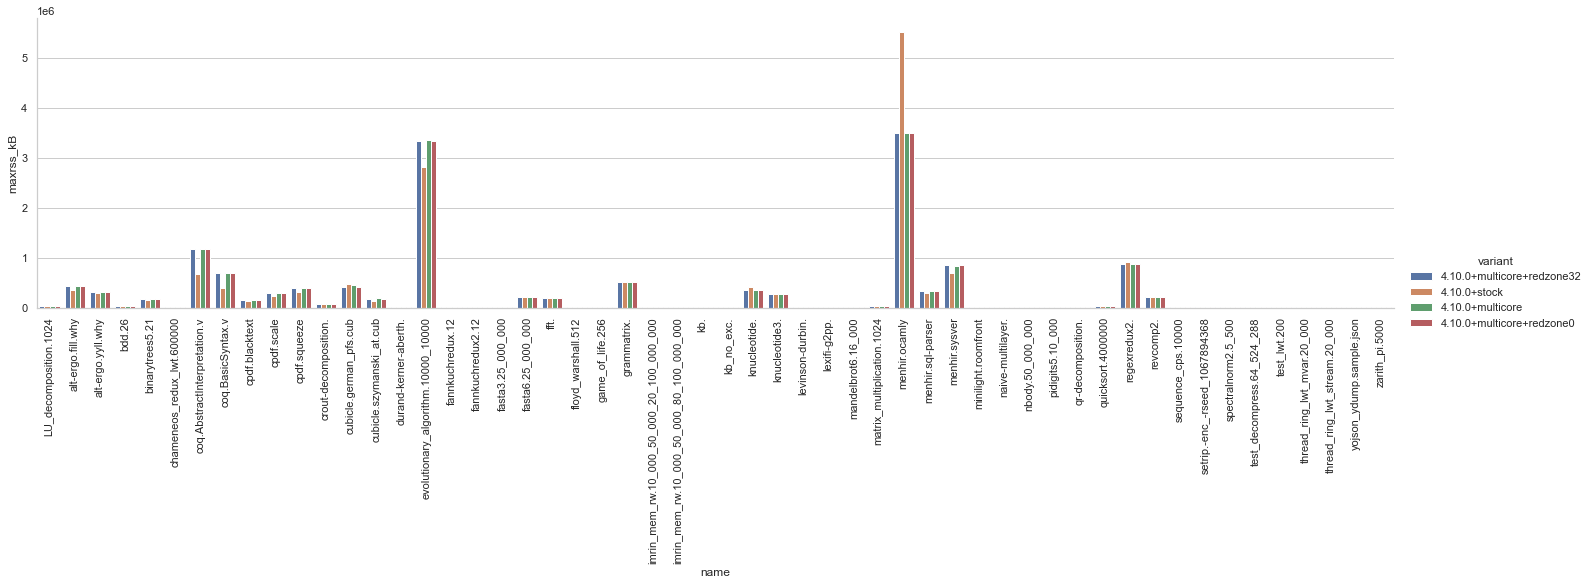

In [41]:
g = sns.catplot (x='name', y='maxrss_kB', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-35-b900b1f7d74d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


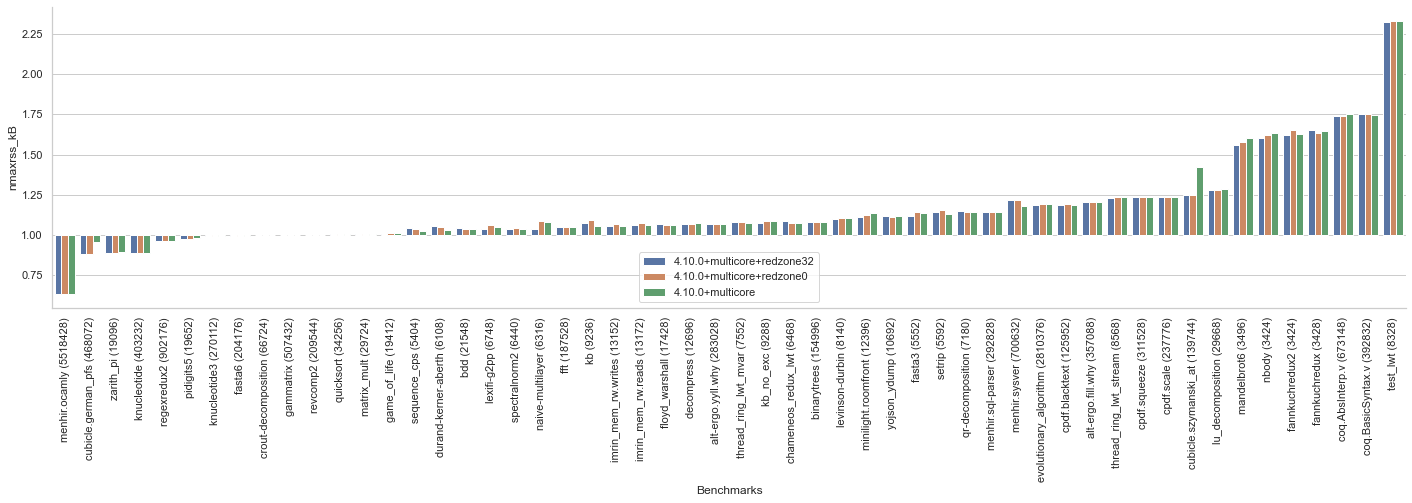

In [42]:
ndf = normalise(df,baseline,'maxrss_kB')
plot_normalised(ndf,baseline,'nmaxrss_kB')

## Major Collections

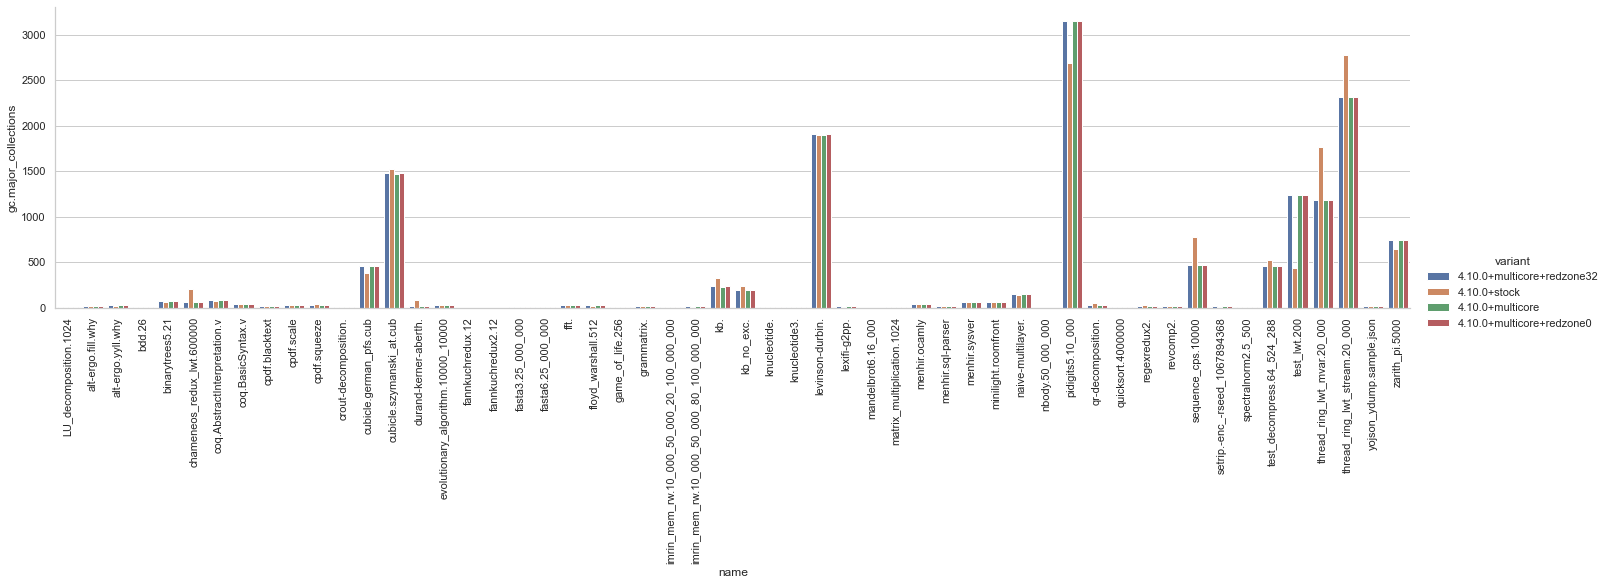

In [43]:
g = sns.catplot (x='name', y='gc.major_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-35-b900b1f7d74d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


,name,gc.major_collections,variant,display_name,bgc.major_collections,ngc.major_collections
10,LU_decomposition.1024,2,4.10.0+multicore,lu_decomposition (4),4,0.500000
22,alt-ergo.fill.why,17,4.10.0+multicore,alt-ergo.fill.why (13),13,1.307692
12,alt-ergo.yyll.why,26,4.10.0+multicore,alt-ergo.yyll.why (20),20,1.300000
34,bdd.26,9,4.10.0+multicore,bdd (11),11,0.818182
41,binarytrees5.21,68,4.10.0+multicore,binarytrees (63),63,1.079365
33,chameneos_redux_lwt.600000,62,4.10.0+multicore,chameneos_redux_lwt (202),202,0.306931
47,coq.AbstractInterpretation.v,78,4.10.0+multicore,coq.AbsInterp.v (68),68,1.147059
6,coq.BasicSyntax.v,42,4.10.0+multicore,coq.BasicSyntax.v (41),41,1.024390
32,cpdf.blacktext,13,4.10.0+multicore,cpdf.blacktext (15),15,0.866667
37,cpdf.scale,27,4.10.0+multicore,cpdf.scale (29),29,0.931034


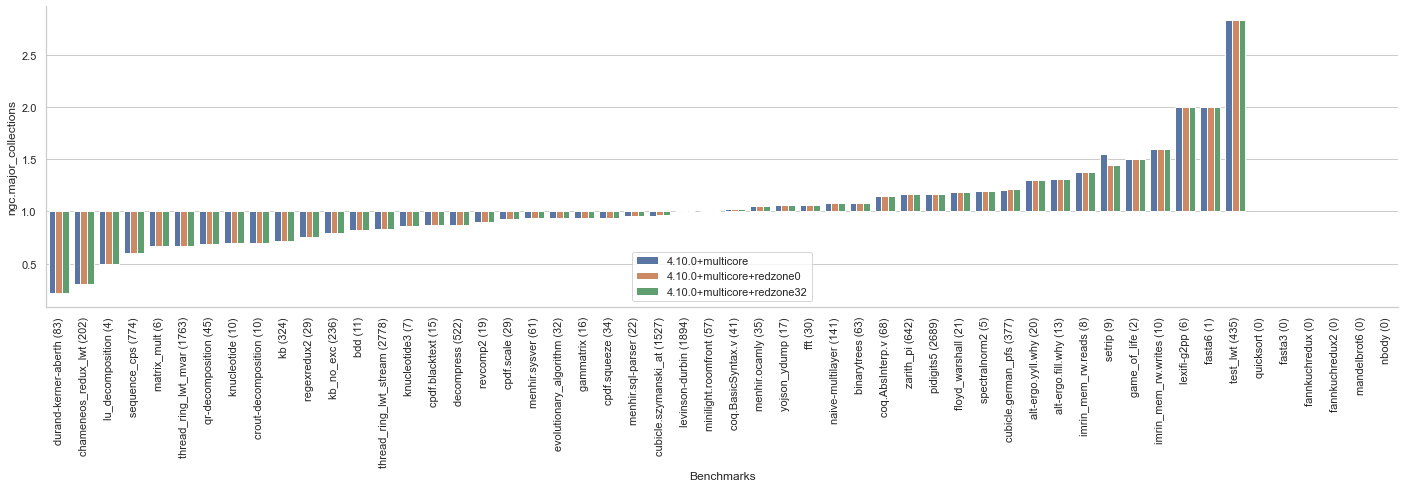

In [44]:
ndf = normalise(df,baseline,'gc.major_collections')
plot_normalised(ndf,baseline,'ngc.major_collections')
ndf

## Major words

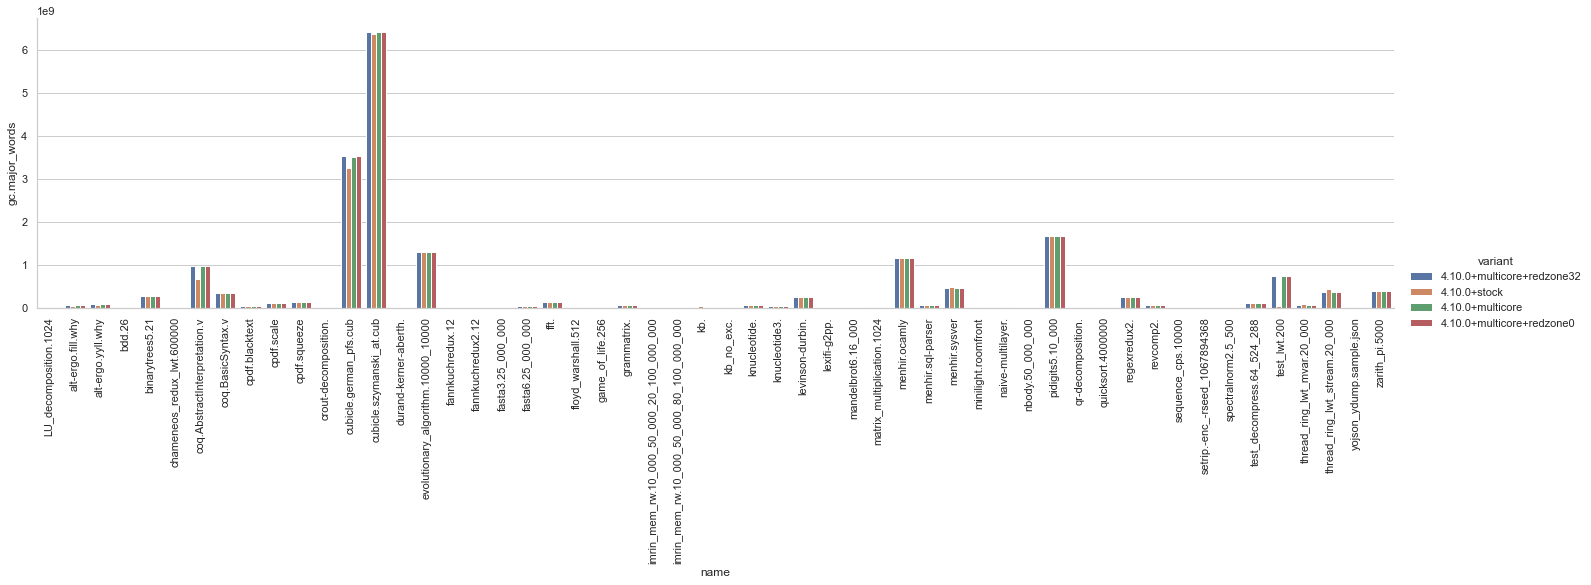

In [45]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-35-b900b1f7d74d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


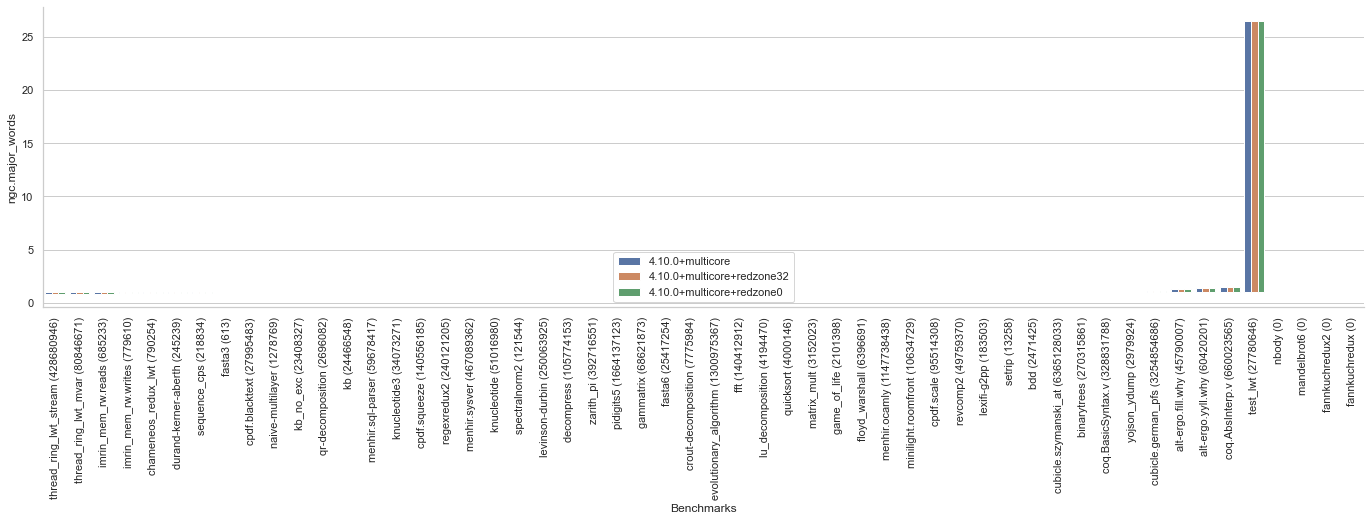

In [46]:
ndf = normalise(df,baseline,'gc.major_words')
plot_normalised(ndf,baseline,'ngc.major_words')

## Minor Collections

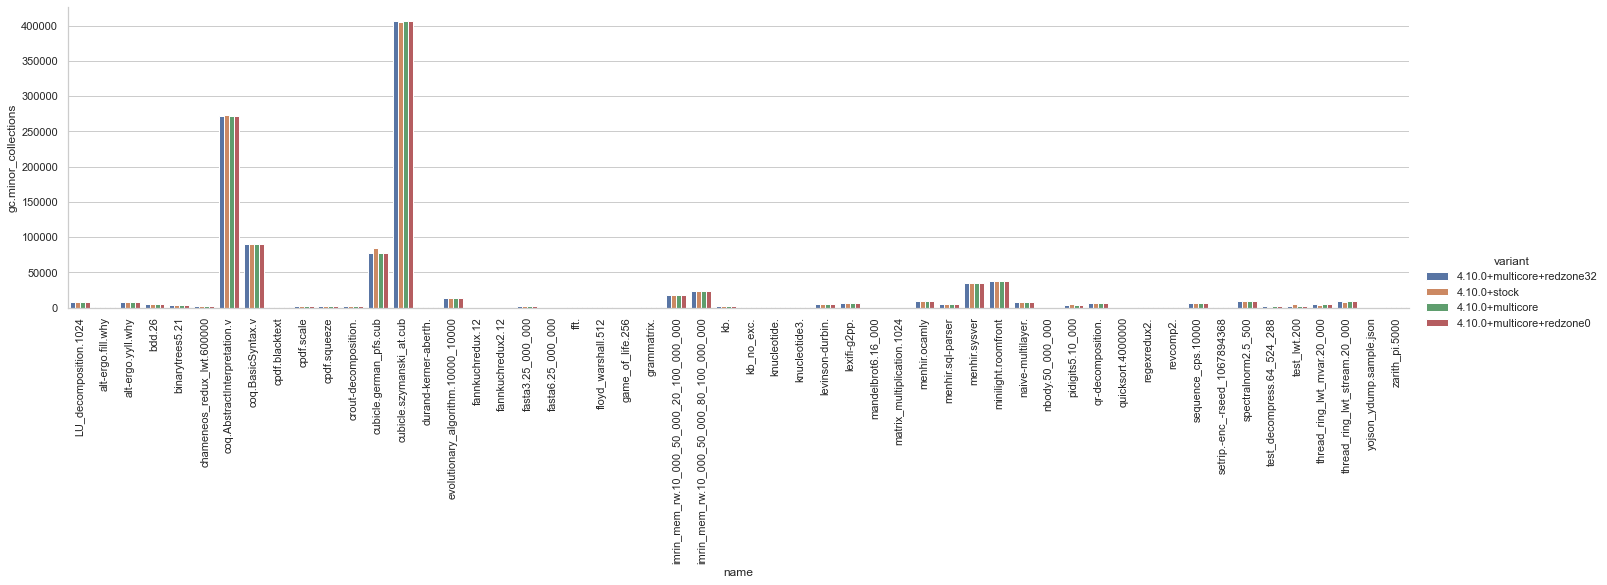

In [47]:
g = sns.catplot (x='name', y='gc.minor_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

<ipython-input-35-b900b1f7d74d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


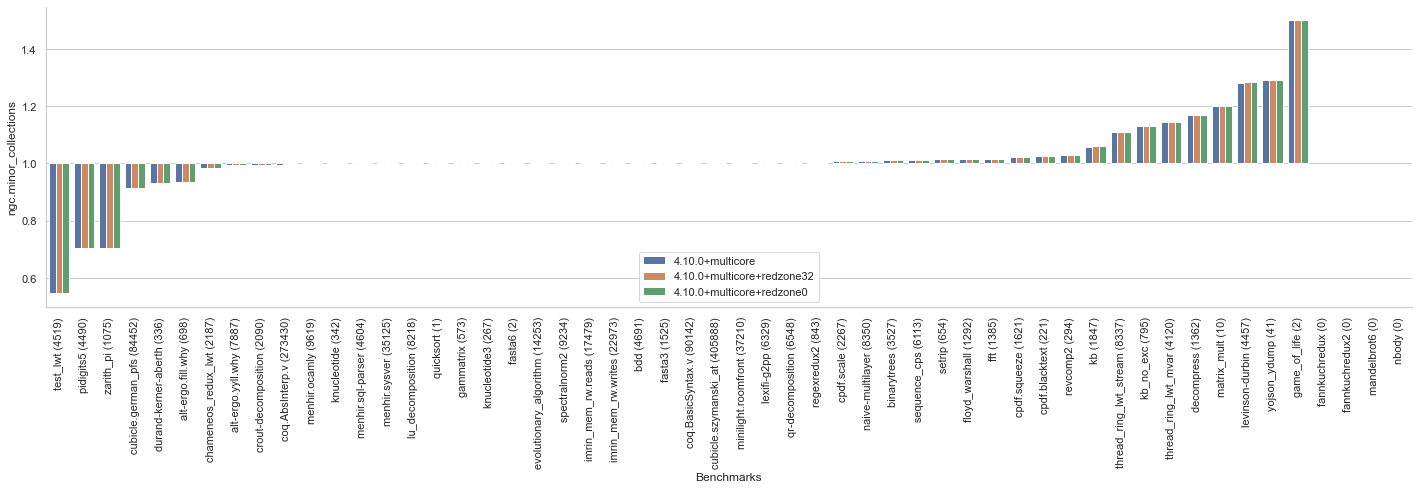

In [48]:
ndf = normalise(df,baseline,'gc.minor_collections')
plot_normalised(ndf,baseline,'ngc.minor_collections')

## Codesize

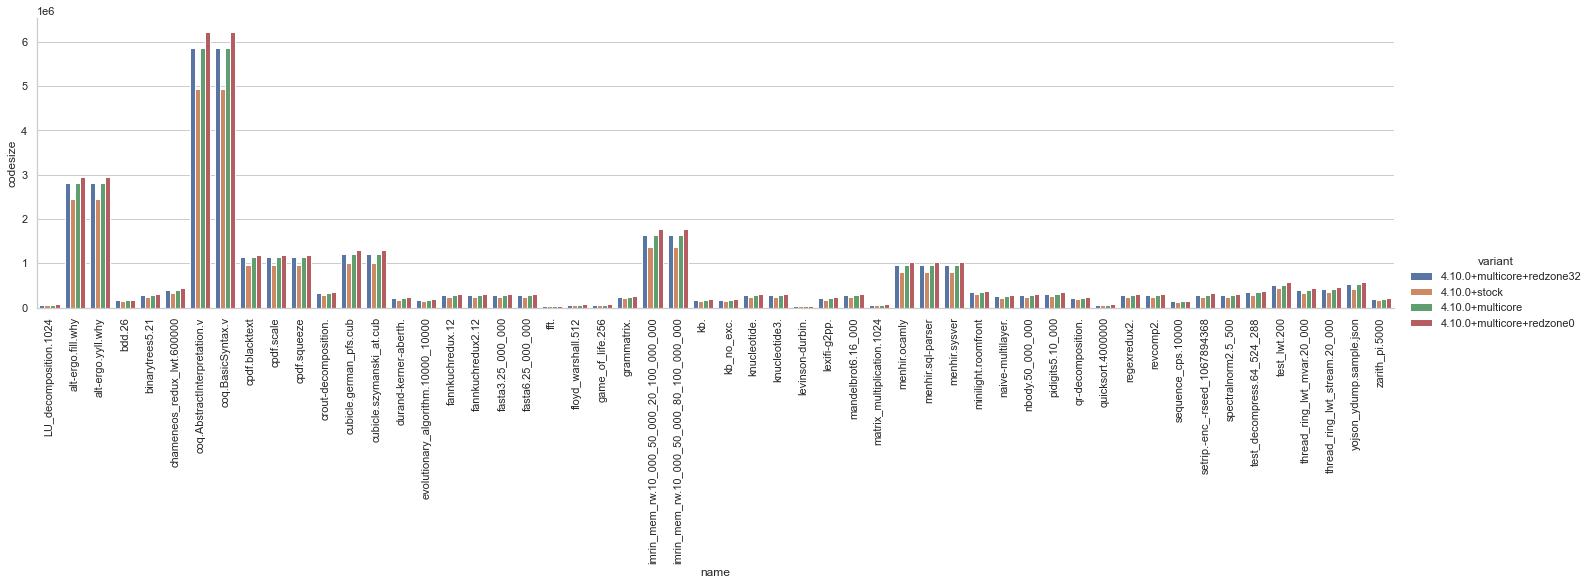

In [49]:
g = sns.catplot (x='name', y='codesize', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-35-b900b1f7d74d>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


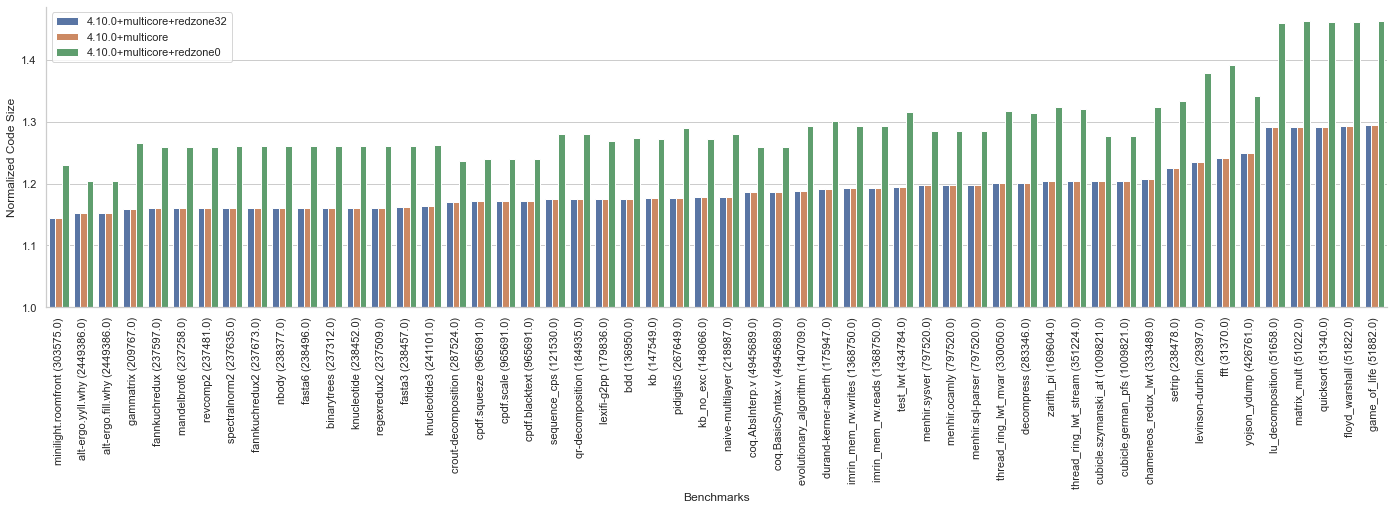

In [50]:
ndf = normalise(df,baseline,'codesize')
g = plot_normalised(ndf,baseline,'ncodesize')
g.ax.legend(loc=2)
g.ax.set_xlabel("Benchmarks")
g.ax.set_ylabel("Normalized Code Size")
g

### Geomean

In [53]:
for g in ndf.groupby('variant'):
    (v,_df) = g
    print(v,geo_mean(_df['ncodesize'].values))

4.10.0+multicore 1.1918413224499307
4.10.0+multicore+redzone0 1.2941794575856125
4.10.0+multicore+redzone32 1.1918254500325614
